# Numerical Simulation Laboratory                                                         
                                        Department of Physics, University of Milan(It)
                                        Spring 2020 
                                                                     Mattia Corigliano
## 3<sup>rd </sup> Computational Exercise

In [23]:
### importing useful libraries
import numpy as np
import matplotlib.pyplot as plt

##  setting the Layout
import matplotlib as mpl
## LINES
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '-'
## AXES
mpl.rcParams['axes.linewidth'] = 1 ## edge linewidth
mpl.rcParams['axes.grid'] = True ## display grid or not
mpl.rcParams['axes.titlesize'] = 16 ## fontsize of the axes title
#mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize'] = 14  ## fontsize of the x any y labels
mpl.rcParams['axes.formatter.limits'] = [-2,6] # use scientific notation if log10
mpl.rcParams['axes.formatter.use_mathtext'] = True # When True, use mathtext for scientific
mpl.rcParams['legend.fontsize'] = 12
## TICKS
mpl.rcParams['xtick.labelsize'] = 12 ## fontsize of the tick labels
mpl.rcParams['ytick.labelsize'] = 12 
mpl.rcParams['xtick.minor.visible'] = True ## visibility of minor ticks on x-axis
mpl.rcParams['ytick.minor.visible'] = True
## FIGURE
mpl.rcParams['figure.titleweight'] = 'bold' ## weight of the figure title
mpl.rcParams['figure.subplot.wspace'] = 0.3
mpl.rcParams['figure.subplot.hspace'] = 0.7
## ERRORBARS
mpl.rcParams['errorbar.capsize'] = 2  ## length of end cap on error bars in pixels

###   A.  Plain vanilla option pricing

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ C\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

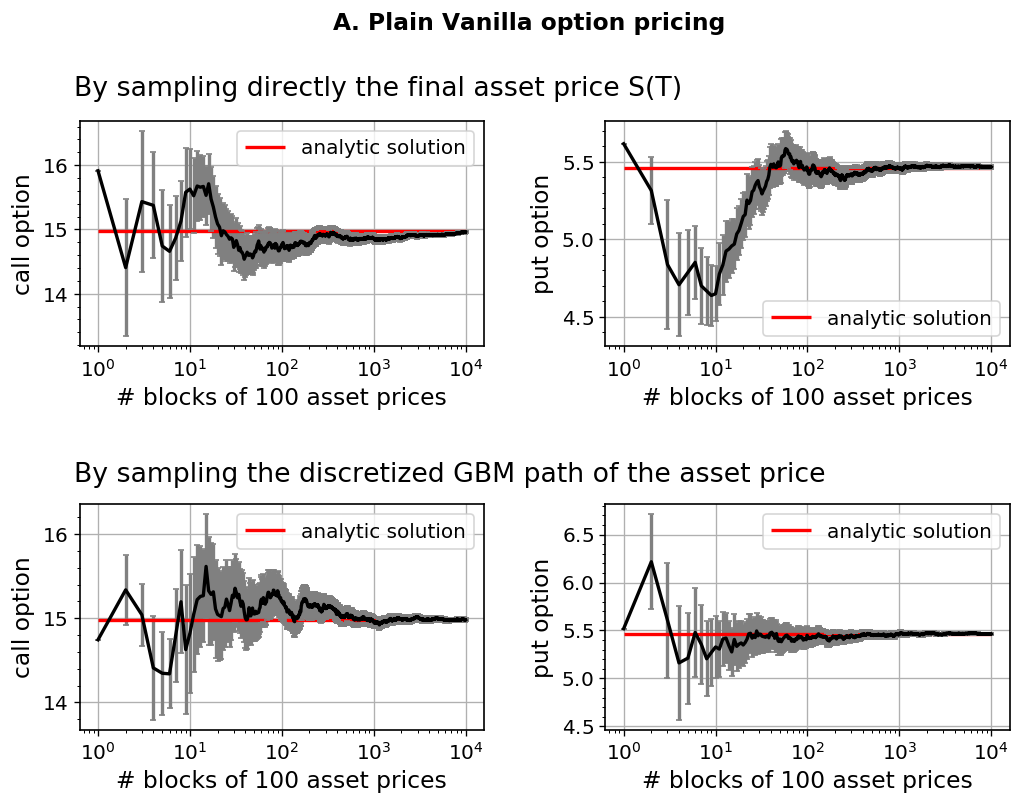

In [31]:
plt.figure(figsize=(10, 7), dpi=120)
plt.suptitle('A. Plain Vanilla option pricing', size=14)
mpl.rcParams['figure.subplot.top'] = 0.85

data = np.loadtxt("data/output.txt").T
block_length = int(data[0][0])
analytical_solution = [14.975790778311286, 5.4595325819072364]*2

Nplots = [1, 2, 3, 4]
xlabels = ['# blocks of {} asset prices'.format(block_length)]*4
ylabels = ['call option', 'put option']*2

for plot in Nplots:
    plt.subplot(2, 2, plot); 
    plt.errorbar(data[0]/block_length, 
                 data[2*plot-1], 
                 yerr=data[2*plot], 
                 color = 'black', 
                 ecolor="gray")
    plt.hlines(analytical_solution[plot-1], 1, 10000, color='red', lw = 2,
              label = 'analytic solution')
    plt.semilogx()
    plt.legend()
    plt.xlabel(xlabels[plot-1])
    plt.ylabel(ylabels[plot-1])

fig = plt.gcf()
fig.text(0.12, 0.88, "By sampling directly the final asset price S(T)", size = 16)
fig.text(0.12, 0.42, "By sampling the discretized GBM path of the asset price", size = 16)
plt.show()